# Homework 1

## Hitesh N Lala



### ASTROINFORMATICS FALL 2018
https://github.com/astromundus/astroinfo2018


## Problem 1

Using astroML figure 3.12 as a template, see

http://www.astroml.org/book_figures/chapter3/fig_cauchy_median_mean.html

add another panel, similar to the top panel, that will plot and compare 
results for standard deviation and $\sigma_G$. 


## Problem 2

Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

## Problem 3

Do the same for a Cauchy distribution with the same $\mu$ and $\gamma=0.2$. 

## Problem 4
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays) 
another sample of 10,000 data values drawn from a Cauchy distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Discuss the difference.  

### Some useful definitions and functions

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
from astroML.plotting import hist as fancyhist
from scipy.stats import norm, cauchy

## Problem 1
Using astroML figure 3.12 as a template, see

http://www.astroml.org/book_figures/chapter3/fig_cauchy_median_mean.html

add another panel, similar to the top panel, that will plot and compare 
results for standard deviation and $\sigma_G$. 

### Solution 1: 

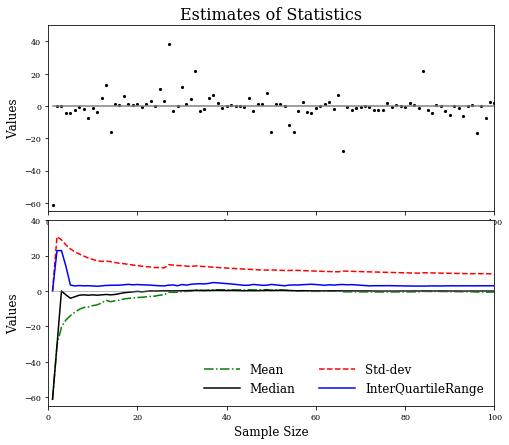

In [2]:
np.random.seed(5)
mu = 0
gamma = 2
xi = cauchy(mu, gamma).rvs(100)                            #Getting Cauchy distributed random vars
Nrange = np.arange(1, len(xi) + 1)


mean = [np.mean(xi[:N]) for N in Nrange]                    #Getting the properties of the data
median = [np.median(xi[:N]) for N in Nrange]
std = [np.std(xi[:N]) for N in Nrange]
iqrange = [0.743*(np.percentile(xi[:N],75) - np.percentile(xi[:N],25)) for N in Nrange]


fig = plt.figure(figsize=(8, 7))
fig.subplots_adjust(hspace=0.05)


ax = fig.add_subplot(211)
ax.scatter(Nrange, xi, lw=0, s=10, c='k')
ax.plot(Nrange, 0 * Nrange, '-', c='gray')
ax.set_xlim(0, 100)
ax.set_ylim(-65, 50)
ax.set_title("Estimates of Statistics", fontsize = 16)
ax.set_ylabel('Values', fontsize = 12)


ax = fig.add_subplot(212)
ax.plot(Nrange, mean, '-.g', label='Mean')
ax.plot(Nrange, median, '-k', label='Median')
ax.plot(Nrange, std, '--r', label= 'Std-dev')
ax.plot(Nrange, iqrange, '-b', label= 'InterQuartileRange')
ax.plot(Nrange, 0 * Nrange, '-', c='gray', lw=0.5)
ax.set_xlim(0, 100)
ax.set_ylim(-65, 40)
ax.legend(ncol=2, frameon=False, fontsize=12)
ax.set_xlabel('Sample Size', fontsize = 12)
ax.set_ylabel('Values', fontsize = 12)

plt.show()

## Problem 2


Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

### Solution 2: 

/home/hnlala9/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


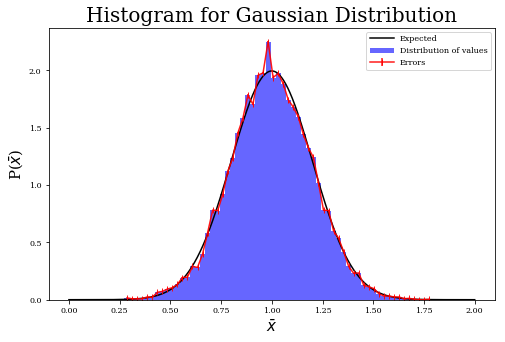

In [3]:
mean = 1.0
sigma = 0.2
smpl_sz = 10000

x = norm(mean, sigma).rvs(smpl_sz)


fig, ax = plt.subplots(figsize = (8,5))
details = fancyhist(x, bins="freedman", alpha=0.6, color = 'b', label= 'Distribution of values', normed = 'True')
ax.set_title("Histogram for Gaussian Distribution", fontsize = 20)
ax.set_xlabel(r"$\bar{x}$", fontsize = 15)                      #Defining bin size using AstroML's histogram
ax.set_ylabel(r"P($\bar{x}$)", fontsize = 15)


nk = details[0]                                                 #Getting the errors
bin_start = details[1]
bin_size = np.ones((len(bin_start)-1))
bin_center = np.ones((len(bin_start)-1))
for i in range(len(bin_start)-1):
    bin_size[i] = bin_start[i+1] - bin_start[i]
    bin_center[i] = bin_start[i] + (0.5*bin_size[i])
    
poss_err = np.sqrt(nk)/(bin_size*smpl_sz)                         
plt.errorbar(bin_center, nk, yerr = poss_err, marker = "|", color='red', alpha=0.9, label = 'Errors')


xrange = np.linspace(0, 2, 1000)                                  #Getting the original Gaussian dist.
true_dist = norm(mean, sigma).pdf(xrange)  
plt.plot(xrange, true_dist, ls='-', c='black', label='Expected')
plt.legend()

## Problem 3
Do the same for a Cauchy distribution with the same μ and γ=0.2. 

### Solution 3: 

/home/hnlala9/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


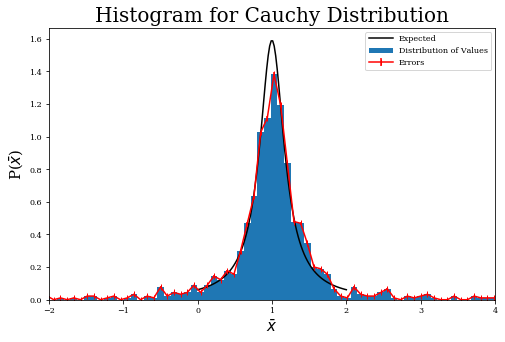

In [4]:
from scipy.stats import cauchy
from astroML.plotting import hist as fancyhist

mean = 1.0
gamma = 0.2
smpl_sz = 1000                     #Using 1000 values as the system breaks down for a larger numver

x = cauchy(mean, gamma).rvs(smpl_sz)


fig, ax = plt.subplots(figsize = (8,5))
details = fancyhist(x, bins="freedman", normed = 'True', label='Distribution of Values')
ax.set_title("Histogram for Cauchy Distribution", fontsize = 20)
ax.set_xlabel(r"$\bar{x}$", fontsize = 15)
ax.set_ylabel(r"P($\bar{x}$)", fontsize = 15)


nk = details[0]
bin_start = details[1]
bin_size = np.ones((len(bin_start)-1))
bin_center = np.ones((len(bin_start)-1))
for i in range(len(bin_start)-1):
    bin_size[i] = bin_start[i+1] - bin_start[i]
    bin_center[i] = bin_start[i] + (0.5*bin_size[i])

poss_err = np.sqrt(nk)/(bin_size*smpl_sz)


plt.errorbar(bin_center, nk, yerr = poss_err, marker = "|", color='red', label='Errors')


xrange = np.linspace(0, 2, 100)
true_dist = cauchy(mean, gamma).pdf(xrange)  
plt.xlim(-2, 4)
plt.plot(xrange, true_dist, ls='-', c='black', label='Expected')
plt.legend()

## Problem 4
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays) 
another sample of 10,000 data values drawn from a Cauchy distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Discuss the difference.  

### Solution 4: 
### Freedman Binning

/home/hnlala9/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


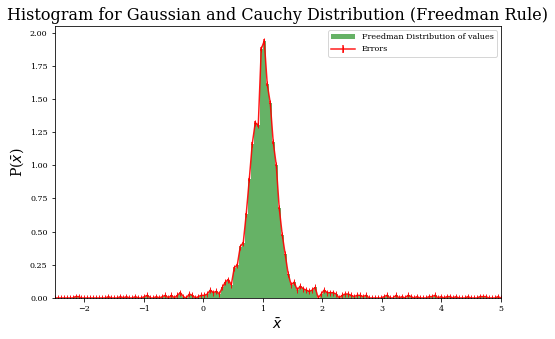

In [5]:

mean = 1.0
sigma = 0.2
smpl_sz = 1000


x_gauss = norm(mean, sigma).rvs(smpl_sz)
y_cauchy = cauchy(mean, gamma).rvs(smpl_sz)
z = np.append(x_gauss,y_cauchy)


fig, ax = plt.subplots(figsize = (8,5))
details = fancyhist(z, bins="freedman", alpha=0.6, color = 'green', label= 'Freedman Distribution of values', normed = 'True')
ax.set_title("Histogram for Gaussian and Cauchy Distribution (Freedman Rule)", fontsize = 16)
ax.set_xlabel(r"$\bar{x}$", fontsize = 14)
ax.set_ylabel(r"P($\bar{x}$)", fontsize = 14)


nk = details[0]
bin_start = details[1]
bin_size = np.ones((len(bin_start)-1))
bin_center = np.ones((len(bin_start)-1))
for i in range(len(bin_start)-1):
    bin_size[i] = bin_start[i+1] - bin_start[i]
    bin_center[i] = bin_start[i] + (0.5*bin_size[i])

poss_err = np.sqrt(nk)/(bin_size*2*smpl_sz)

plt.errorbar(bin_center, nk, yerr = poss_err, marker = "|", color='red', alpha=0.9, label = 'Errors')

plt.xlim(-2.5,5)
plt.legend()

### Scotts Binning

/home/hnlala9/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


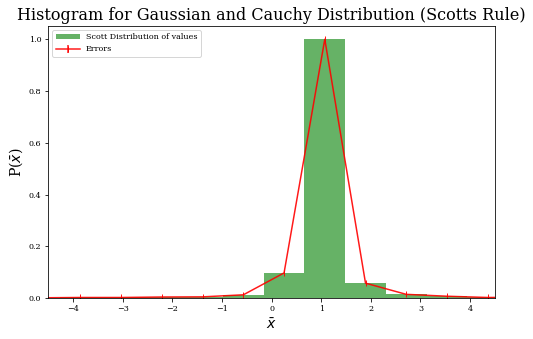

In [6]:
mean = 1.0
sigma = 0.2
smpl_sz = 1000


x_gauss = norm(mean, sigma).rvs(smpl_sz)
y_cauchy = cauchy(mean, gamma).rvs(smpl_sz)
z = np.append(x_gauss,y_cauchy)


fig, ax = plt.subplots(figsize = (8,5))
details = fancyhist(z, bins="scott", alpha=0.6, color = 'green', label= 'Scott Distribution of values', normed = 'True')
ax.set_title("Histogram for Gaussian and Cauchy Distribution (Scotts Rule)", fontsize = 16)
ax.set_xlabel(r"$\bar{x}$", fontsize = 14)
ax.set_ylabel(r"P($\bar{x}$)", fontsize = 14)


nk = details[0]
bin_start = details[1]
bin_size = np.ones((len(bin_start)-1))
bin_center = np.ones((len(bin_start)-1))
for i in range(len(bin_start)-1):
    bin_size[i] = bin_start[i+1] - bin_start[i]
    bin_center[i] = bin_start[i] + (0.5*bin_size[i])

poss_err = np.sqrt(nk)/(bin_size*2*smpl_sz)


plt.errorbar(bin_center, nk, yerr = poss_err, marker = "|", color='red', alpha=0.9, label = 'Errors')

plt.xlim(-4.5,4.5)
plt.legend()